In [1]:
import os
import sys

# Define local pass #
#wd_path = '/home/hbkoziel/pyfesom/'

sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#sys.path.append(wd_path)
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
#sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
#import cmocean as cmap
#from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import time
#import seaborn as sns

import xarray as xr
import pandas as pd

No joblib
no cmocean


In [3]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/DIN_budgetv2/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [4]:
depth = mesh.zlevs
ind_max_depth = 18
depth = depth[0:18]
depth[0:16]

array([ -0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       115., 135., 160., 190., 230.])

In [5]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [6]:
colors = plt.get_cmap("tab10")

# pan-Arctic continental slope

In [7]:
ind_bio = np.load('index_slope.npy')

In [8]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1_sl = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [9]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df1_sl[tracer] = data_reg

df1_sl['time'] = dates
df1_sl.set_index('time', inplace= True)

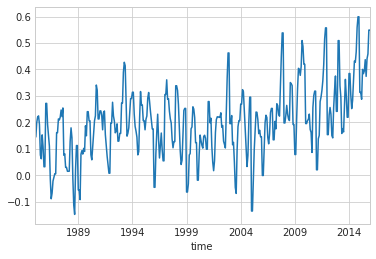

In [10]:
plt.style.use('seaborn-whitegrid')
df1_sl['VADVv2'].plot()

In [11]:
df1_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_sl_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_sl_yearly['time'] = dates
df1_sl_yearly.set_index('time', inplace= True)
df1_sl_yearly.to_pickle('VADV_sl')

In [12]:
np.shape(yearly_data)

(31, 753179)

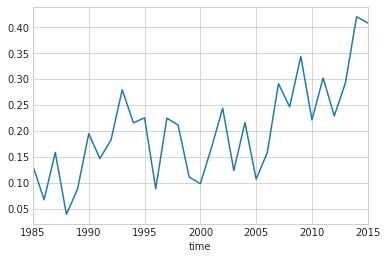

In [13]:
plt.style.use('seaborn-whitegrid')
df1_sl_yearly['VADVv2'].plot()

In [14]:
tracer = 'HADVv2'
df3_sl = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [15]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df3_sl[tracer] = data_reg

df3_sl['time'] = dates
df3_sl.set_index('time', inplace= True)

In [16]:
df3_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_sl_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_sl_yearly['time'] = dates
df3_sl_yearly.set_index('time', inplace= True)
df3_sl_yearly.to_pickle('HADV_sl')

In [17]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2_sl = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [18]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df2_sl[tracer] = data_reg

df2_sl['time'] = dates
df2_sl.set_index('time', inplace= True)

In [19]:
np.shape(data_sel)

(192, 753179)

In [20]:
df2_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_sl_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_sl_yearly['time'] = dates
df2_sl_yearly.set_index('time', inplace= True)
df2_sl_yearly.to_pickle('VEDY_sl')

In [23]:
tracer = 'HEDYv2'
df4_sl = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [24]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df4_sl[tracer] = data_reg

df4_sl['time'] = dates
df4_sl.set_index('time', inplace= True)

In [25]:
df4_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_sl_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_sl_yearly['time'] = dates
df4_sl_yearly.set_index('time', inplace= True)
df4_sl_yearly.to_pickle('HEDY_sl')

# Eurasian basin

In [26]:
ind_bio = np.load('index_eurasian.npy')

In [27]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1_eu = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [28]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df1_eu[tracer] = data_reg

df1_eu['time'] = dates
df1_eu.set_index('time', inplace= True)

In [29]:
df1_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_eu_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_eu_yearly['time'] = dates
df1_eu_yearly.set_index('time', inplace= True)
df1_eu_yearly.to_pickle('VADV_eu')

In [30]:
tracer = 'HADVv2'
df3_eu = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [31]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df3_eu[tracer] = data_reg

df3_eu['time'] = dates
df3_eu.set_index('time', inplace= True)

In [32]:
df3_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_eu_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_eu_yearly['time'] = dates
df3_eu_yearly.set_index('time', inplace= True)
df3_eu_yearly.to_pickle('HADV_eu')

In [33]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2_eu = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [34]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df2_eu[tracer] = data_reg

df2_eu['time'] = dates
df2_eu.set_index('time', inplace= True)

In [35]:
df2_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_eu_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_eu_yearly['time'] = dates
df2_eu_yearly.set_index('time', inplace= True)
df2_eu_yearly.to_pickle('VEDY_eu')

In [36]:
tracer = 'HEDYv2'
df4_eu = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [37]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df4_eu[tracer] = data_reg

df4_eu['time'] = dates
df4_eu.set_index('time', inplace= True)

In [38]:
df4_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_eu_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_eu_yearly['time'] = dates
df4_eu_yearly.set_index('time', inplace= True)
df4_eu_yearly.to_pickle('HEDY_eu')

# Amerasian Basin

In [39]:
ind_bio = np.load('index_amerasian.npy')

In [40]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1_am = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [41]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df1_am[tracer] = data_reg

df1_am['time'] = dates
df1_am.set_index('time', inplace= True)

In [42]:
df1_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_am_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_am_yearly['time'] = dates
df1_am_yearly.set_index('time', inplace= True)
df1_am_yearly.to_pickle('VADV_am')

In [43]:
tracer = 'HADVv2'
df3_am = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [44]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df3_am[tracer] = data_reg

df3_am['time'] = dates
df3_am.set_index('time', inplace= True)

In [45]:
df3_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_am_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_am_yearly['time'] = dates
df3_am_yearly.set_index('time', inplace= True)
df3_am_yearly.to_pickle('HADV_am')

In [46]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2_am = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [47]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df2_am[tracer] = data_reg

df2_am['time'] = dates
df2_am.set_index('time', inplace= True)

In [48]:
df2_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_am_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_am_yearly['time'] = dates
df2_am_yearly.set_index('time', inplace= True)
df2_am_yearly.to_pickle('VEDY_am')

In [49]:
tracer = 'HEDYv2'
df4_am = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [50]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df4_am[tracer] = data_reg

df4_am['time'] = dates
df4_am.set_index('time', inplace= True)

In [51]:
df4_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_am_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_am_yearly['time'] = dates
df4_am_yearly.set_index('time', inplace= True)
df4_am_yearly.to_pickle('HEDY_am')

# All Arctic

In [54]:
ind_bio = np.load('index_all.npy')

In [57]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1_al = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [58]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df1_al[tracer] = data_reg

df1_al['time'] = dates
df1_al.set_index('time', inplace= True)

In [60]:
df1_al_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_al_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_al_yearly['time'] = dates
df1_al_yearly.set_index('time', inplace= True)
df1_al_yearly.to_pickle('VADV_all')

In [61]:
print(np.shape(yearly_data))
pff = np.polyfit(years, yearly_data, 1)
VADV_trend = pff[0]
np.shape(VADV_trend)
np.save('VADV_trend',VADV_trend)

(31, 753179)


In [64]:
tracer = 'HADVv2'
df3_al = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [65]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df3_al[tracer] = data_reg

df3_al['time'] = dates
df3_al.set_index('time', inplace= True)

In [66]:
df3_al_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_al_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_al_yearly['time'] = dates
df3_al_yearly.set_index('time', inplace= True)
df3_al_yearly.to_pickle('HADV_all')

In [67]:
print(np.shape(yearly_data))
pff = np.polyfit(years, yearly_data, 1)
HADV_trend = pff[0]
np.shape(HADV_trend)
np.save('HADV_trend',HADV_trend)

(31, 753179)


In [68]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2_al = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [69]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df2_al[tracer] = data_reg

df2_al['time'] = dates
df2_al.set_index('time', inplace= True)

In [70]:
df2_al_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_al_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_al_yearly['time'] = dates
df2_al_yearly.set_index('time', inplace= True)
df2_al_yearly.to_pickle('VEDY_all')

In [71]:
print(np.shape(yearly_data))
pff = np.polyfit(years, yearly_data, 1)
VEDY_trend = pff[0]
np.shape(VEDY_trend)
np.save('VEDY_trend',VEDY_trend)

(16, 753179)


In [72]:
tracer = 'HEDYv2'
df4_al = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()

In [73]:
# integrate over the upper 200m
data_sel = data_sel[:,:,:16]
a = np.ones(np.shape(data_sel))
a[None,None,:] = np.diff(depth[0:17])
data_sel = data_sel * a
data_sel = data_sel.sum(axis=2)
data_reg = np.nansum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.nansum(NodalAreaModel[ind_bio])
df4_al[tracer] = data_reg

df4_al['time'] = dates
df4_al.set_index('time', inplace= True)

In [74]:
df4_al_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_al_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_al_yearly['time'] = dates
df4_al_yearly.set_index('time', inplace= True)
df4_al_yearly.to_pickle('HEDY_all')

In [75]:
print(np.shape(yearly_data))
pff = np.polyfit(years, yearly_data, 1)
HEDY_trend = pff[0]
np.shape(HEDY_trend)
np.save('HEDY_trend',HEDY_trend)

(16, 753179)


# Visualization

In [76]:
df1_sl_yearly = pd.read_pickle('VADV_sl')
df2_sl_yearly = pd.read_pickle('VEDY_sl')
df3_sl_yearly = pd.read_pickle('HADV_sl')
df4_sl_yearly = pd.read_pickle('HEDY_sl')

df1_eu_yearly = pd.read_pickle('VADV_eu')
df2_eu_yearly = pd.read_pickle('VEDY_eu')
df3_eu_yearly = pd.read_pickle('HADV_eu')
df4_eu_yearly = pd.read_pickle('HEDY_eu')

df1_am_yearly = pd.read_pickle('VADV_am')
df2_am_yearly = pd.read_pickle('VEDY_am')
df3_am_yearly = pd.read_pickle('HADV_am')
df4_am_yearly = pd.read_pickle('HEDY_am')

df1_al_yearly = pd.read_pickle('VADV_all')
df2_al_yearly = pd.read_pickle('VEDY_all')
df3_al_yearly = pd.read_pickle('HADV_all')
df4_al_yearly = pd.read_pickle('HEDY_all')

Text(0.5,0,'time [years]')

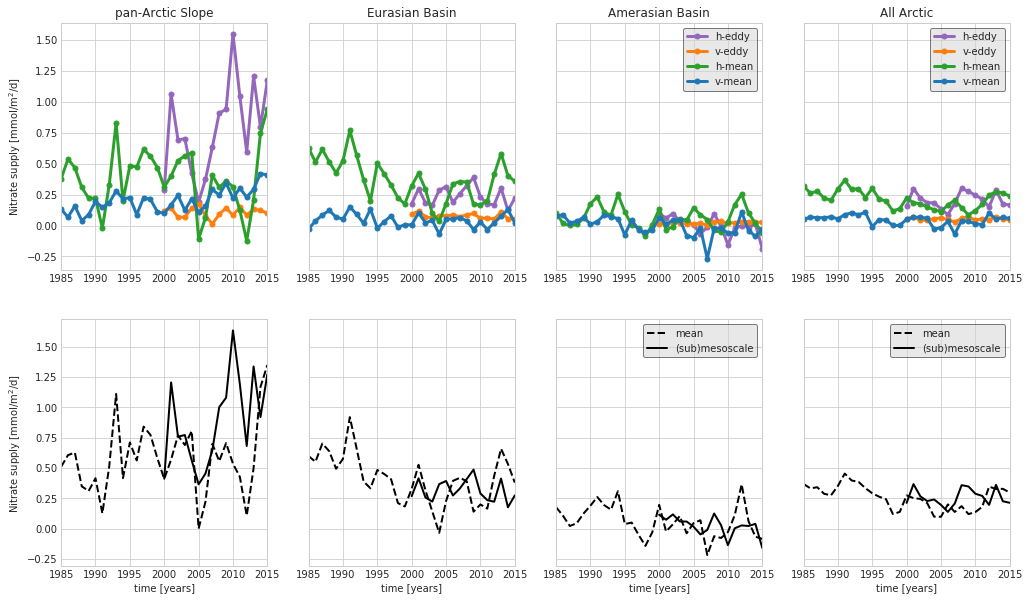

In [77]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
figsize=(17, 10)

rows,cols = 2,4
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=False, sharex=False, sharey='row')#sharey='row'

# fig = plt.figure(figsize=(17, 10), facecolor='w', edgecolor='k', sharex = True, sharey=True)
# axs = fig.subplots(rows,cols,sharey=False,sharex=True)

plt.style.use('seaborn-whitegrid')

df4_sl_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='v-eddy',color=colors(4))
df2_sl_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='v-eddy',color=colors(1))
df3_sl_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='h-mean',color=colors(2))
df1_sl_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='v-mean',color=colors(0))
ax1.set_title('pan-Arctic Slope')
ax1.set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
ax1.xaxis.label.set_visible(False)

ax5.plot(years,df1_sl_yearly['VADVv2']+df3_sl_yearly['HADVv2'],'--k',lw=2,label='mean')
ax5.plot(years[15:],df4_sl_yearly['HEDYv2']+df2_sl_yearly['VEDYv2'],'k',lw=2,label='(sub)mesoscale')
ax5.set_xlim(1985,2015)
ax5.set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
ax5.set_xlabel('time [years]')

df4_eu_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='v-eddy',color=colors(4))
df2_eu_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='v-eddy',color=colors(1))
df3_eu_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='h-mean',color=colors(2))
df1_eu_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='v-mean',color=colors(0))
ax2.set_title('Eurasian Basin')
ax2.xaxis.label.set_visible(False)

ax6.plot(years,df1_eu_yearly['VADVv2']+df3_eu_yearly['HADVv2'],'--k',lw=2,label='mean')
ax6.plot(years[15:],df4_eu_yearly['HEDYv2']+df2_eu_yearly['VEDYv2'],'k',lw=2,label='(sub)mesoscale')
ax6.set_xlim(1985,2015)
ax6.set_xlabel('time [years]')

df4_am_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, label='h-eddy',color=colors(4))
df2_am_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, label='v-eddy',color=colors(1))
df3_am_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, label='h-mean',color=colors(2))
df1_am_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, label='v-mean',color=colors(0))
ax3.set_title('Amerasian Basin')
ax3.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax3.xaxis.label.set_visible(False)

ax7.plot(years, df1_am_yearly['VADVv2']+df3_am_yearly['HADVv2'],'--k',lw=2,label='mean')
ax7.plot(years[15:], df4_am_yearly['HEDYv2']+df2_am_yearly['VEDYv2'],'k',lw=2,label='(sub)mesoscale')
ax7.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax7.set_xlim(1985,2015)
ax7.set_xlabel('time [years]')

df4_al_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, label='h-eddy',color=colors(4))
df2_al_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, label='v-eddy',color=colors(1))
df3_al_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, label='h-mean',color=colors(2))
df1_al_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, label='v-mean',color=colors(0))
ax4.set_title('All Arctic')
ax4.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax4.xaxis.label.set_visible(False)

ax8.plot(years, df1_al_yearly['VADVv2']+df3_al_yearly['HADVv2'],'--k',lw=2,label='mean')
ax8.plot(years[15:], df4_al_yearly['HEDYv2']+df2_al_yearly['VEDYv2'],'k',lw=2,label='(sub)mesoscale')
ax8.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax8.set_xlim(1985,2015)
ax8.set_xlabel('time [years]')

#plt.savefig(save_path+'FIG9.png', dpi = 300, bbox_inches='tight')

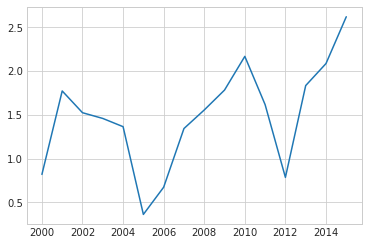

In [80]:
plt.plot(years[15:],df1_sl_yearly['VADVv2'][15:]+df3_sl_yearly['HADVv2'][15:]+df4_sl_yearly['HEDYv2']+df2_sl_yearly['VEDYv2'])

In [79]:
years[:10]

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994])

In [ ]:
# fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
# plt.style.use('seaborn')

# first_year = 1985
# last_year  = 2015
# years      = np.arange(first_year,last_year+1,1)

# ax1      = fig.add_subplot(311)
# df1['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df2['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df3['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# #df4['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# plt.title('Eurasian basin')
# ax1.set_ylim(-0.015,0.025)

# ax2      = fig.add_subplot(312)
# df1_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df2_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df3_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# #df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# ax2.set_ylim(-0.006,0.011)

# ax3      = fig.add_subplot(313)
# plt.plot(years,df1_yearly['VADVv2']+df3_yearly['HADVv2'],'--k',lw=2)
# plt.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)

In [ ]:
# first_year = 1985
# last_year  = 2015
# years      = np.arange(first_year,last_year+1,1)


# fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
# plt.style.use('seaborn')

# ax1      = fig.add_subplot(311)
# df1['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df2['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df3['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# #df4['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# plt.title('Amerasian basin')
# ax1.set_ylim(-0.015,0.025)

# ax2      = fig.add_subplot(312)
# df1_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df2_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df3_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# #df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# ax2.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)
# ax2.set_ylim(-0.006,0.011)

# ax3      = fig.add_subplot(313)
# plt.plot(years,df1_yearly['VADVv2']+df3_yearly['HADVv2'],'--k',lw=2)
# plt.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)